# Testing detection of seeded events

Load in the finding code. 

In [15]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook

In [ ]:
from random import randint
pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')

Minframe= FindMinFrame(data)

In [ ]:
valid = np.where(~np.isnan(ObjectMask(data,Minframe)))
positionx = randint(0,valid[0].shape[0])
Start = randint(0,data.shape[0])

In [2]:
funny_keywords = {'1CTYP4': 'CTYPE1',
                  '2CTYP4': 'CTYPE2',
                  '1CRPX4': 'CRPIX1',
                  '2CRPX4': 'CRPIX2',
                  '1CRVL4': 'CRVAL1',
                  '2CRVL4': 'CRVAL2',
                  '1CUNI4': 'CUNIT1',
                  '2CUNI4': 'CUNIT2',
                  '1CDLT4': 'CDELT1',
                  '2CDLT4': 'CDELT2',
                  '11PC4': 'PC1_1',
                  '12PC4': 'PC1_2',
                  '21PC4': 'PC2_1',
                  '22PC4': 'PC2_2'}
mywcs = {}
for oldkey, newkey in funny_keywords.items():
    mywcs[newkey] = hdu[1].header[oldkey]
wcs = WCS(mywcs)

In [240]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from random import randint
save = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/Kilonova/'
D = np.arange(1,110,10)*1e6 # distance in Mpc

pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')


D = [40e6]
Result = []
Fakes = []
Masked = []
starts = []
positions = []
for distance in tqdm_notebook(D):
    Run = []
    Run_fakes = []
    Run_masked = []
    Kilonova, Kilotime = K2Kilonova(3,distance)
    Kilonova = Kilonova[0,Kilotime > 0]
    for i in tqdm_notebook(range(10),leave = False):
        
        xposition = randint(0,data.shape[1]-1)
        yposition = randint(0,data.shape[2]-1)
        Position = [xposition,yposition]
        positions.append(Position)
        Start = 1000 #randint(0,data.shape[0]-1)
        starts.append(Start)
        if Kilonova.shape[0] > data[Start:].shape[0]:
            ReKilonova = Kilonova[:data[Start:].shape[0]]
        else:
            temp = np.zeros(data[Start:].shape[0])
            temp[:Kilonova.shape[0]] = Kilonova
            ReKilonova = temp
        testdata = np.copy(data)
        testdata[Start:,Position[0],Position[1]] = testdata[Start:,Position[0],Position[1]] + ReKilonova
        detec, falsedetec, maskeddetec = K2tranPix(testdata,time,Qual,wcs,Position,Start)
        Run.append(detec)
        Run_fakes.append(falsedetec)
        Run_masked.append(maskeddetec)
    Result.append(Run)
    Fakes.append(Run_fakes)
    Masked.append(Run_masked)
Result = np.array(Result)
Fakes = np.array(Fakes)
Masked = np.array(Masked)



HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Eventmask
[1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054
 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1088 1089
 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1108 1109 1110
 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140
 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155
 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170
 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185
 1186 1187 1188 1189 1190 1191 1192 1193 1194]
2
[1074 1074 1074]
T1
TL1
T1
TL1
TL2
[1039, 1195]
402.066862676
32.9596896498
34.6847010405
TLF
T1
TL1
TL2
[1039, 1195]
461.371459309
70.6691172623
68.2941629608
TLF
3
[1074 1074]
4
End
Eventmask
[1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 10

T1
TS1
T1
TL1
TL2
[1241, 1339]
333.104829103
146.034016105
122.017118031
T1
TL1
T1
TL1
T1
TL1
TL2
[1347, 1819]
180.424331577
153.242960523
135.598135254
T1
TL1
TL2
[1347, 1819]
502.963355379
687.178302709
854.308944696
T1
TL1
TL2
[1347, 1819]
469.423343429
652.389491723
810.830510019
3
[834]
4
End



<IPython.core.display.Javascript object>


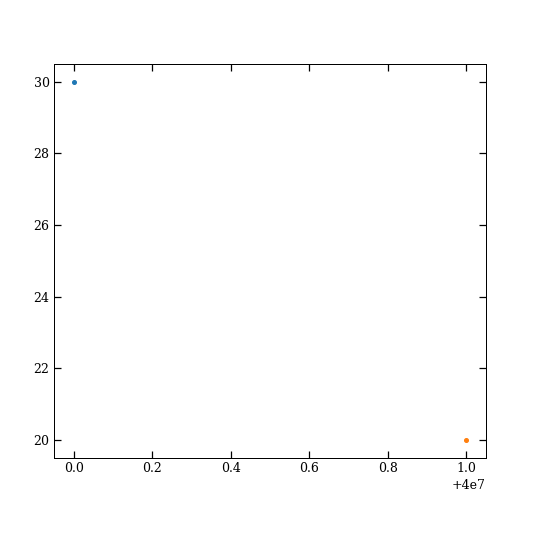

3.0

In [242]:
Percentage = np.nansum(Result, axis= 1)/Result.shape[1]
MaskedP = np.nansum(Masked, axis= 1)/Masked.shape[1]
plt.figure()
plt.plot(D,Percentage*100,'.')
plt.plot(D[0]+1,MaskedP*100,'.');
np.nansum(Fakes)

In [241]:
Result+Masked

array([[ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.]])

In [238]:
Fakes

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

<IPython.core.display.Javascript object>


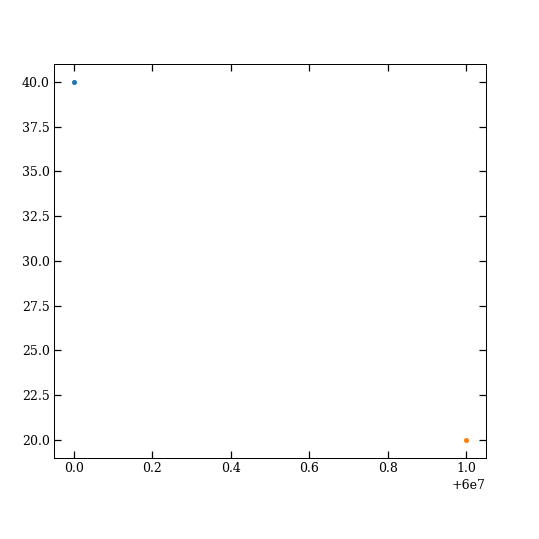

125

In [ ]:
Thruste

In [ ]:
Sampled = np.zeros((data.shape[1],data.shape[2]))
Failed = np.zeros((data.shape[1],data.shape[2]))
Failtime = np.zeros(data.shape[0])

for i in range(len(positions)):
    Sampled[positions[i][0],positions[i][1]] += 1
    if Result[0,i] != 1:
        Failed[positions[i][0],positions[i][1]] += 1
        Failtime[starts[i]] += 1
    
plt.figure()
plt.title('Seeded event distribution')
plt.imshow(Sampled,origin = 'lower')
plt.tight_layout()
plt.colorbar();
print(np.mean(Sampled))

plt.figure()
plt.title('Undetected events')
plt.imshow(Failed,origin = 'lower')
plt.colorbar()
plt.tight_layout();


In [ ]:
std = np.nanstd(data,axis= 0)
plt.figure()
plt.imshow(std,origin = 'lower',vmax=100)
plt.colorbar()
median = np.nanmedian(data,axis= 0)
plt.figure()
plt.imshow(2*std+median,origin = 'lower',vmax=200)
plt.colorbar()

In [ ]:
plt.figure()
testlight = np.nansum(data[:,4:6,1:3],axis= (1,2))
plt.plot(testlight,'.')

In [ ]:
plt.figure()
plt.plot(np.arange(0,data.shape[0],1),Failtime)

In [ ]:
starts[50:60]

In [ ]:
D[5]

In [43]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix.py'

from random import randint
pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')

Minframe= FindMinFrame(data)

D = 51000000.0
save = save + str(D)
Kilonova, Kilotime = K2Kilonova(3,D)
Kilonova = Kilonova[0,Kilotime > 0]
if Kilonova.shape[0] > data[starts[51]:].shape[0]:
    Kilonova = Kilonova[:data[starts[51]:].shape[0]]
else:
    temp = np.zeros(data[starts[51]:].shape[0])
    temp[:Kilonova.shape[0]] = Kilonova
    Kilonova = temp
testdata[starts[51]:,6,5] = data[starts[51]:,6,5] + Kilonova
thing = K2tranPix(testdata,time,Qual,wcs,pixfile,save)

IndexError: list index out of range

In [44]:
(starts)

AttributeError: 'list' object has no attribute 'sha'

## Testing parabola fit

In [ ]:
lc = np.nansum(data[:,0:8,1:4],axis=(1,2))
eventtime = np.where((time >69.3+time[0]) & (time < 79.2+time[0]))[0]

In [ ]:
middle = np.where(np.nanmax(lc[eventtime[0]-1:eventtime[-1]+1]) == lc)[0][0]
x = np.arange(middle-2,middle+2+1,1)
x2 = np.arange(0,len(x),1)
y = lc[x]
p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)
p2 = np.poly1d(p1)
maxpoly = np.where(np.nanmax(p2(x)) == p2(x))[0][0]


In [ ]:
np.save('testdata.npy',testdata)

In [ ]:
np.where(time>=42+time[0])[0][0]

In [ ]:
p2 = np.poly1d(p1)
plt.figure()
plt.plot(x,lc[x],'.')
plt.plot(x,p2(x),'.')
plt.ylabel('Counts')
plt.xlabel('Time')
plt.title('Residual = ' + str(residual))

## other stuff


In [ ]:
lc = np.nansum(data*event,axis=(1,2))
eventtime = np.where((time >70.6+time[0]) & (time < 71.4+time[0]))[0]
middle = np.where(np.nanmax(lc[eventtime[0]-1:eventtime[-1]+1]) == lc)[0][0]
x = np.arange(middle-3,middle+3+1,1)
x2 = np.arange(0,len(x),1)
y = lc[x]
p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)

In [247]:

# coding: utf-8

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from scipy.signal import convolve2d
from scipy.signal import deconvolve
from scipy.ndimage.filters import convolve

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from glob import glob
import os

from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from scipy.ndimage.filters import convolve

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from glob import glob
import os

from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

def MinThrustframe(data,thrust):
    mean = np.nanmean(data[thrust+1],axis = 0)
    std = np.nanstd((data[thrust+1] - mean), axis = (1,2))
    Framemin = np.where(std == np.nanmin(abs(std)))[0][0]
    return thrust[Framemin]+1

def DriftKiller(data,thrust):
    # The right value choice here is a bit ambiguous, though it seems that typical variations are <10.
    Drift = (abs(data[thrust+1]-data[thrust-1]) < 10)*1.0 
    Drift[Drift == 0] = np.nan
    j = 0
    for i in range(len(thrust)):
        data[j:thrust[i]] = data[j:thrust[i]]*Drift[i]
        j = thrust[i]
    return data

def FindMinFrame(data):
    # Finding the reference frame
    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(data[i:-n_steps+i:n_steps,:,:] - data[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    return Framemin

def ObjectMask(datacube,Framemin):
    # Make a mask of the target object, using the reference frame 
    Mask = datacube[Framemin,:,:]/(np.nanmedian(datacube[Framemin,:,:])+np.nanstd(datacube[Framemin,:,:]))
    Mask[Mask>=1] = np.nan
    Mask[Mask<1] = 1
    # Generate a second mask from remainder of the first. This grabs the fainter pixels around known sources
    Maskv2 = datacube[Framemin,:,:]*Mask/(np.nanmedian(datacube[Framemin,:,:]*Mask)+np.nanstd(datacube[Framemin,:,:]*Mask))
    Maskv2[Maskv2>=1] = np.nan
    Maskv2[Maskv2<1] = 1
    return Maskv2

def EventSplitter(events,Times,Masks):
    Events = []
    times = []
    mask = []
    for i in range(len(events)):
        # Check if there are multiple transients
        Coincident = convolve(Masks[events[i]]*1, np.ones((3,3)), mode='reflect')
        positions = np.where(Coincident == 9)
        for p in range(len(positions[0])):
            eventmask = np.zeros((Masks.shape[1],Masks.shape[2]))
            eventmask[positions[0][p],positions[1][p]] = 1
            eventmask = convolve(eventmask,np.ones((3,3)),mode='constant', cval=0.0)
            Similar = np.where(np.nansum(Masks[Times[i][0]:Times[i][-1],:,:]*eventmask,axis = (1,2)) > 0)[0]
            if len(Similar) > 0:
                timerange = [Similar[0]+Times[i][0]-1,Similar[-1]+Times[i][0]+1]
                if len(timerange) > 1:
                    Events.append(events[i])
                    times.append(timerange)
                    mask.append(eventmask)

    return Events, times, mask

def Asteroid_fitter(Mask,Time,Data, plot = False):
    lc = np.nansum(Data*Mask,axis=(1,2))
    middle = np.where(np.nanmax(lc[Time[0]-1:Time[-1]+1]) == lc)[0][0]
    x = np.arange(middle-2,middle+2+1,1)
    x2 = np.arange(0,len(x),1)
    y = lc[[np.arange(middle-2,middle+2+1,1)]]
    p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)
    p2 = np.poly1d(p1)
    maxpoly = np.where(np.nanmax(p2(x)) == p2(x))[0][0]
    if (residual < 5000) &  (abs(middle - x[maxpoly]) < 2):
        asteroid = True
        if plot == True:
            p2 = np.poly1d(p1)
            plt.figure()
            plt.plot(x,lc[x],'.')
            plt.plot(x,p2(x),'.')
            plt.ylabel('Counts')
            plt.xlabel('Time')
            plt.title('Residual = ' + str(residual))
            
    else:
        asteroid = False
        
    return asteroid 

def Smoothmax(interval,Lightcurve,qual):
    x = np.arange(interval[0],interval[1],1.)
    x[qual[interval[0]:interval[-1]]!=0] = np.nan 
    nbins = int(len(x)/5)
    y = np.copy(Lightcurve[interval[0]:interval[-1]])
    y[qual[interval[0]:interval[-1]]!=0] = np.nan
    
    if np.nansum(x) > 0:
        n, _ = np.histogram(x, bins=nbins,range=(np.nanmin(x),np.nanmax(x)))
        sy, _ = np.histogram(x, bins=nbins, weights=y,range=(np.nanmin(x),np.nanmax(x)))
        sy2, _ = np.histogram(x, bins=nbins, weights=y*y,range=(np.nanmin(x),np.nanmax(x)))
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        xrange = np.linspace(np.nanmin(x),np.nanmax(x),len(x))
        y_smooth = np.interp(xrange, (_[1:] + _[:-1])/2, mean)
        y_smooh_error = np.interp(xrange, (_[1:] + _[:-1])/2, std)

        temp = np.copy(y)
        temp[y_smooh_error>10] =np.nan

        maxpos = np.where(temp == np.nanmax(temp))[0]+interval[0]
    else:
        maxpos = 0
    return maxpos

def ThrusterElim(Events,Times,Masks,Firings,Quality,qual,Data,Real_position):
    temp = []
    temp2 = []
    temp3 = []
    asteroid = []
    asttime = []
    astmask = []
    for i in range(len(Events)):
        Range = Times[i][-1] - Times[i][0]
        if (Range > 0) & (Range/Data.shape[0] < 0.8) & (Times[i][0] > 5): 
            if (Real_position*Masks[i]).any():
                print('T1')
            begining = Firings[(Firings >= Times[i][0]-3) & (Firings <= Times[i][0]+3)]
            if len(begining) == 0:
                begining = Quality[(Quality >= Times[i][0]-1) & (Quality <= Times[i][0]+1)]
            end = Firings[(Firings >= Times[i][-1]-3) & (Firings <= Times[i][-1]+3)]
            if len(end) == 0:
                end = Quality[(Quality >= Times[i][-1]-1) & (Quality <= Times[i][-1]+1)]
            eventthrust = Firings[(Firings >= Times[i][0]) & (Firings <= Times[i][-1])]
            
            if (~begining.any() & ~end.any()) & (len(eventthrust) < 3):
                if (Real_position*Masks[i]).any():
                    print('TS1')
                
                if Asteroid_fitter(Masks[i],Times[i],Data):
                    asteroid.append(Events[i])
                    asttime.append(Times[i])
                    astmask.append(Masks[i])
                else:
                    temp.append(Events[i])
                    temp2.append(Times[i])
                    temp3.append(Masks[i])
                    if (Real_position*Masks[i]).any():
                        print('TSF')
            elif len(eventthrust) >= 3:
                if (Real_position*Masks[i]).any():
                    print('TL1')
                if begining.shape[0] == 0:
                    begining = 0
                else:
                    begining = begining[0]   
                if end.shape[0] == 0:
                    end = Times[i][-1] + 10
                else:
                    end = end[0]
                LC = np.nansum(Data*Masks[i], axis = (1,2))
                maxloc = Smoothmax(Times[i],LC,qual)

                #if ((maxloc > begining) & (maxloc < end)): 
                if (Real_position*Masks[i]).any():
                    print('TL2')
                premean = np.nanmean(LC[eventthrust-1]) 
                poststd = np.nanstd(LC[eventthrust+1])
                postmean = np.nanmedian(LC[eventthrust+1])
                Outsidethrust = Firings[(Firings < Times[i][0]) | (Firings > Times[i][-1]+20)]
                Outsidemean = np.nanmedian(LC[Outsidethrust+1])
                Outsidestd = np.nanstd(LC[Outsidethrust+1])
                if (Real_position*Masks[i]).any():
                    print(postmean)
                    print(Outsidemean)
                    print(Outsidestd)
                if  postmean > Outsidemean+2*Outsidestd:
                    temp.append(Events[i])
                    temp2.append(Times[i])
                    temp3.append(Masks[i])
                    if (Real_position*Masks[i]).any():
                        print('TLF')

    events = np.array(temp)
    eventtime = np.array(temp2)
    eventmask = np.array(temp3)
    print(events)
    return events, eventtime, eventmask, asteroid, asttime, astmask


def pix2coord(x,y,mywcs):
    wx, wy = mywcs.wcs_pix2world(x, y, 0)
    return np.array([float(wx), float(wy)])

def Get_gal_lat(mywcs,datacube):
    ra, dec = mywcs.wcs_pix2world(int(datacube.shape[1]/2), int(datacube.shape[2]/2), 0)
    b = SkyCoord(ra=float(ra)*u.degree, dec=float(dec)*u.degree, frame='icrs').galactic.b.degree
    return b





data = testdata
time = time
Qual = Qual
mywcs = mywcs 
Position = Position
Time = Start
try:
    datacube = data
    if datacube.shape[1] > 1 and datacube.shape[2] > 1:
        thrusters = np.where((Qual == 1048576) | (Qual == 1089568) | (Qual == 1056768) | (Qual == 1064960) | (Qual == 1081376) | (Qual == 10240) | (Qual == 32768) )[0]
        quality = np.where(Qual != 0)[0]
        #calculate the reference frame
        Framemin = FindMinFrame(datacube)
        # Apply object mask to data
        Mask = ObjectMask(datacube,Framemin)

        Maskdata = datacube*Mask
        #Maskdata[Maskdata<0] = 0 

        #Motion control
        #Conv = convolve2d(np.ma.masked_invalid(Mask).mask, np.ones((3,3)), mode="same")
        #Maskdata = Maskdata*(Conv < 2)

        # Make a mask for the object to use as a test to eliminate very bad pointings
        obj = np.ma.masked_invalid(Mask).mask
        objmed = np.nanmedian(datacube[thrusters+1]*obj,axis=(0))
        objstd = np.nanstd(datacube[thrusters+1]*obj,axis=(0))
        Maskdata[(np.nansum(datacube*obj,axis=(1,2)) < np.nansum(objmed-3*objstd)),:,:] = np.nan

        #overflow = ((convolve(Maskdata[(np.nansum(datacube*obj,axis=(1,2)) > np.nansum(objmed+2*objstd)),:,:],
                              #np.ones((1,1,2)), mode='constant', cval=0.0)) >= 1)*1.0
        #overflow[overflow == 1] = np.nan
        #overflow[overflow == 0] = 1
        #Maskdata[(np.nansum(datacube*obj,axis=(1,2)) > np.nansum(objmed+2*objstd)),:,:] = overflow
        #Maskdata[Maskdata > 170000] = np.nan
        #Stdframe = np.ones(Maskdata.shape)
        framemask = np.zeros(Maskdata.shape)

        #Index = (np.nansum(datacube*obj,axis=(1,2))>np.nansum(objmed-3*objstd)) #((np.nanstd(Maskdata,axis=(1,2)) > np.nanmedian(stddist)) & ((Maskdata.shape[1]>1) & (Maskdata.shape[2]>1))) 
        #framemask[Index] = (Maskdata[Index]/(np.nanmedian(Maskdata[Index])+2*(np.nanstd(Maskdata[Index])))) >= 1
        framemask = ((Maskdata/abs(np.nanmedian(Maskdata, axis = (0))+3*(np.nanstd(Maskdata, axis = (0))))) >= 1)
        framemask[:,np.where(Maskdata > 170000)[1],np.where(Maskdata > 170000)[2]] = 0
        #Index = ((np.nanstd(Maskdata) > np.nanmedian(stddist)+np.nanstd(stddist)) & ((Maskdata.shape[1]==1) | (Maskdata.shape[2] == 1))) 

        # Identify if there is a sequence of consecutive or near consecutive frames that meet condtition 
        #Eventmask = (convolve(framemask,np.ones((5,3,3)),mode='constant', cval=0.0) >= 3)
        Real_position = np.zeros((data.shape[1],data.shape[2]))
        Real_position[Position[0],Position[1]] = 1


        Eventmask = (convolve(framemask,np.ones((1,3,3)),mode='constant', cval=0.0))*1
        Eventmask = (convolve(Eventmask,np.ones((5,1,1)),mode='constant', cval=0.0) >= 4)
        Eventmask[Qual!=0,:,:] = False
        
        if (Real_position*Eventmask).any():
            print('Eventmask')
            print(np.where(np.nansum(Real_position*Eventmask,axis=(1,2))>0)[0])

        #Eventmask = DriftKiller(Eventmask*Maskdata,thrusters) > 0
        #Eventmask[np.isnan(Eventmask)] = 0
        Index = np.where(np.nansum(Eventmask*1, axis = (1,2))>0)[0]
        events = []
        eventtime = []
        if len(Index) > 0:
            masklarge = Index[0] 
            masksize = np.nansum(Eventmask[Index[0]]*1,axis = (0,1))
        temp = []
        while len(Index) > 1:
            if (Eventmask[Index[0]]*Eventmask[Index[1]]).any():
                temp = [Index[0],Index[1]]
                if np.nansum(Eventmask[Index[1]]*1,axis = (0,1)) > masksize:
                    masklarge = Index[1]
                    masksize = np.nansum(Eventmask[Index[1]]*1,axis = (0,1))
                else:
                    maskframe = Index[0]
                Index = np.delete(Index,1)
            elif len(temp) == 2:
                events.append(masklarge)
                eventtime.append(temp)
                Index = np.delete(Index,0)
                temp = []
                masklarge = Index[0]
                maskframe = Index[0]
                masksize = np.nansum(Eventmask[Index[0]]*1,axis = (0,1))
            else:
                #events.append(Index[0])
                #eventtime.append([Index[0]])
                Index = np.delete(Index,0)
                temp = []
                masklarge = Index[0]
                maskframe = Index[0]
                masksize = np.nansum(Eventmask[Index[0]]*1,axis = (0,1))
        if len(Index) ==1:
            events.append(Index[0])
            if len(temp) > 0:
                eventtime.append(temp)
            else:
                eventtime.append([Index[0]])        
        events, eventtime, eventmask = EventSplitter(events,eventtime,Eventmask)     
        #eventtime = np.array(eventtime)
        events = np.array(events)
        eventmask = np.array(eventmask)
        if (Real_position*eventmask).any():
            print('2')
            print(events[np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0]])


        # Eliminate events that begin/end within 2 cadences of a thruster fire

        #events, eventtime, eventmask, asteroid, asttime, astmask = ThrusterElim(events,eventtime,eventmask,thrusters,quality,Qual,Maskdata,Real_position)
        events = np.array(events)
        eventtime = np.array(eventtime)
        eventmask = np.array(eventmask)


        temp = []
        temp2 = []
        temp3 = []
        for i in range(len(eventtime)):
            if len(eventtime[i])>0:
                t = np.nansum(Eventmask[eventtime[i][0]:eventtime[i][-1],:,:]*1,axis=(1,2)) > 0
                if np.sum(t)/t.shape[0] > 0:
                    temp.append(eventtime[i][:])
                    temp2.append(events[i])
                    temp3.append(eventmask[i])
        eventtime = np.array(temp)
        events = np.array(temp2)
        eventmask = np.array(temp3)


        temp = []
        for i in range(len(events)):
            if len(np.where(datacube[eventtime[i,0]:eventtime[i,-1]]*eventmask[i] > 170000)[0]) == 0:
                temp.append(i)
        eventtime = eventtime[temp]
        events = events[temp]
        eventmask = eventmask[temp]



        Real_position = np.zeros((data.shape[1],data.shape[2]))
        Real_position[Position[0],Position[1]] = 1
        detection = []
        if len(events) > 0:
            Overlap = (((Real_position*eventmask) == 1).any(axis = (1, 2))) & ((time[eventtime[:,0]] - time[Time]) < 4) & (Time < eventtime[:,0])

            detection = events[Overlap]

            false_detection = len(events[~Overlap])
        else:
            false_detection = 0.

        if len(detection) > 0:
            detect = 1.
        else:
            detect = 0.
        if np.nansum(obj*Real_position) > 0:
            Masked = 1.
        else:
            Masked = 0.

    else:
        detect = -1.
        false_detection = -1.
        Masked = -1.
except (OSError):
    detect = -1.
    false_detection = -1.
    Masked = -1.



Eventmask
[ 565  566  567  568  569  570  571  572  637  638  639  640  641  642  688
  689  690  691  831  832  833  834  835  917  918  919  920  943 1039 1040
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1054 1055 1056 1058
 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1078 1079 1080 1081 1082 1088 1090 1091 1092 1093 1094 1095
 1096 1097 1098 1099 1100 1101 1108 1110 1111 1112 1114 1115 1116 1117 1118
 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148
 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165
 1166 1167 1168 1169 1170 1171 1172 1174 1176 1177 1178 1179 1180 1181 1182
 1183 1185 1186 1187 1188 1190 1191 1192 1193 1194 1195 1205 1206 1207 1243
 1287 1288 1289 1290 1291 1337 1338 1339 1349 1350 1351 1371 1372 1373 1374
 1375 1431 1432 1433 1434 1435 1515 1516 1517 1518 1519 1614 1615 1818 1819]
2

In [248]:
Eventmask[0]

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]], dtype=bool)

<IPython.core.display.Javascript object>


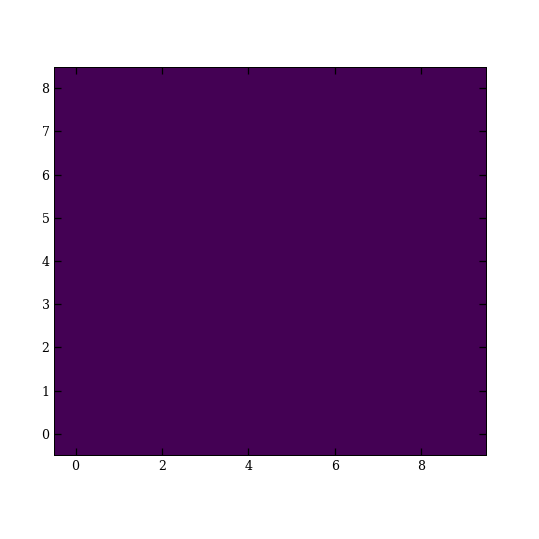

In [152]:
plt.figure()
plt.imshow(Eventmask[2900],origin='lower')

In [42]:
eventtime

array([[2302, 3068],
       [2302, 3068],
       [2302, 3068],
       [2302, 3068],
       [2302, 3068],
       [2302, 3068]])

<IPython.core.display.Javascript object>


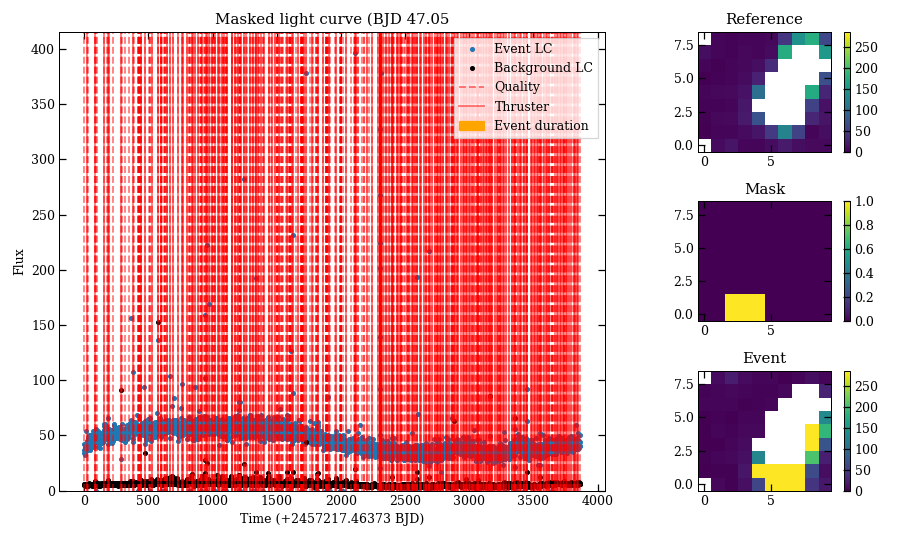

<IPython.core.display.Javascript object>


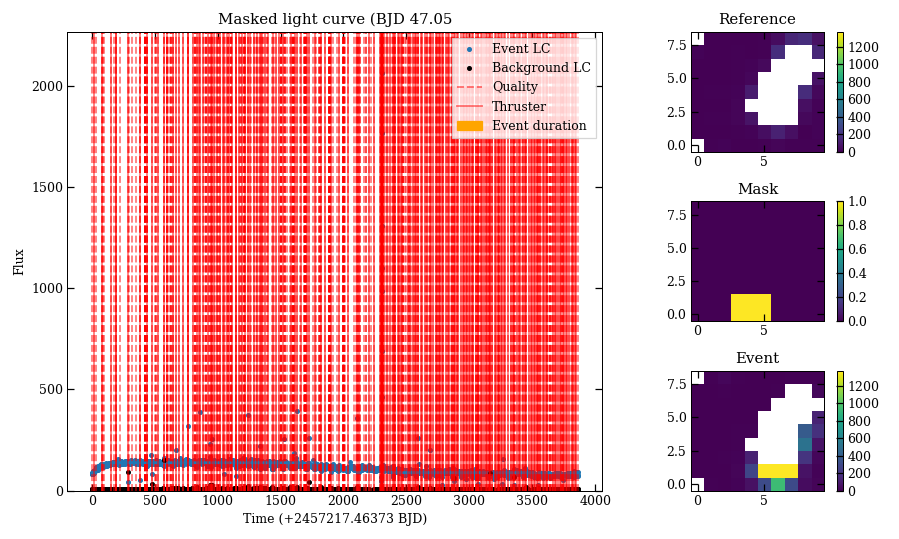

<IPython.core.display.Javascript object>


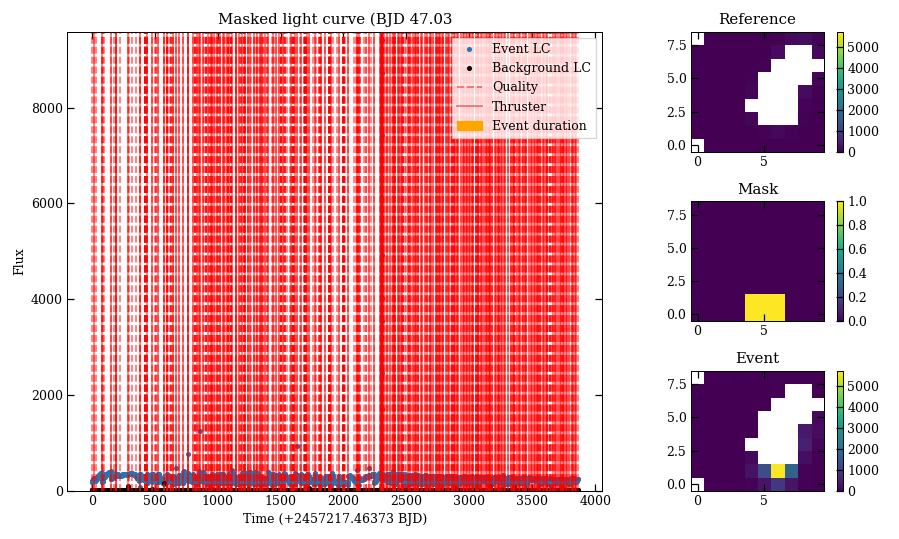

<IPython.core.display.Javascript object>


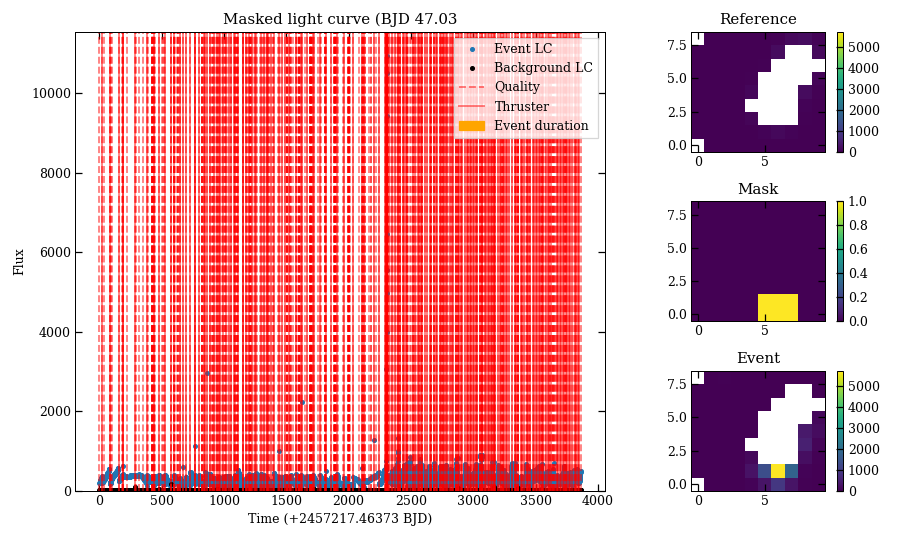

<IPython.core.display.Javascript object>


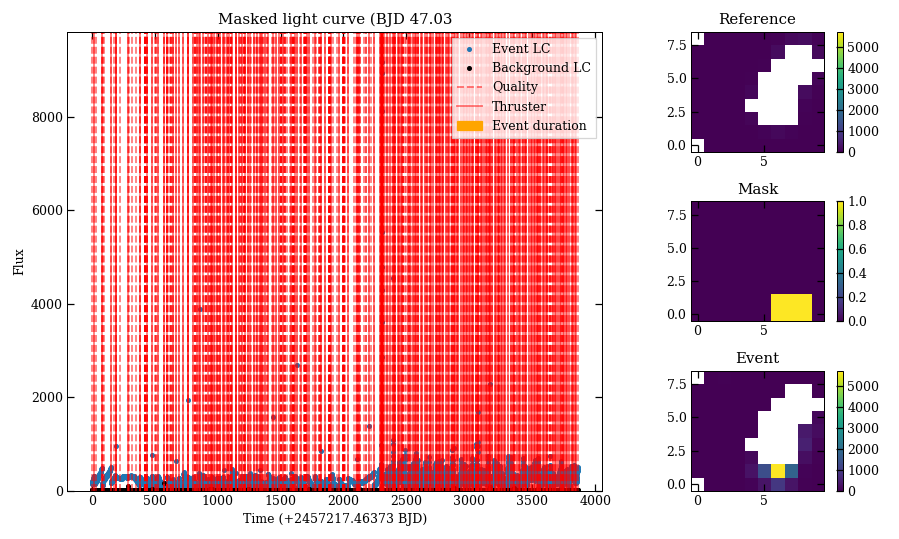

<IPython.core.display.Javascript object>


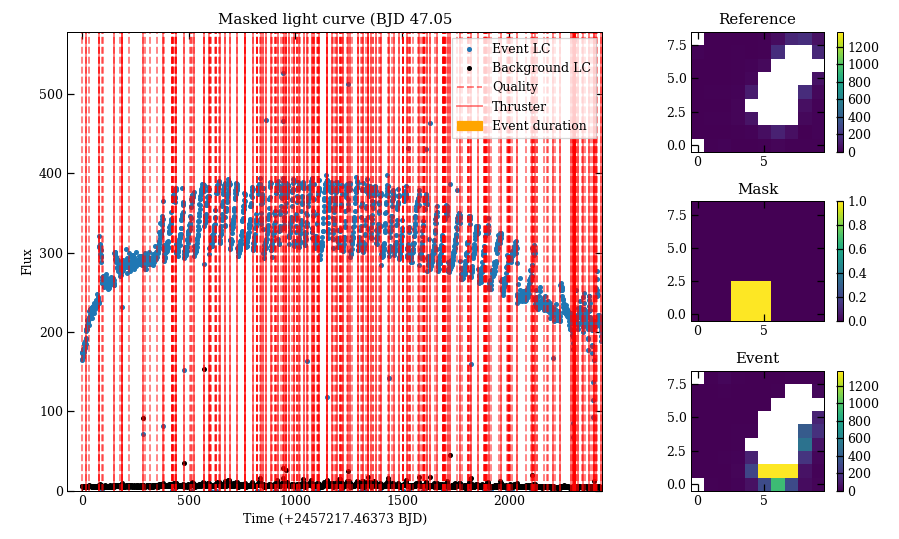

<IPython.core.display.Javascript object>


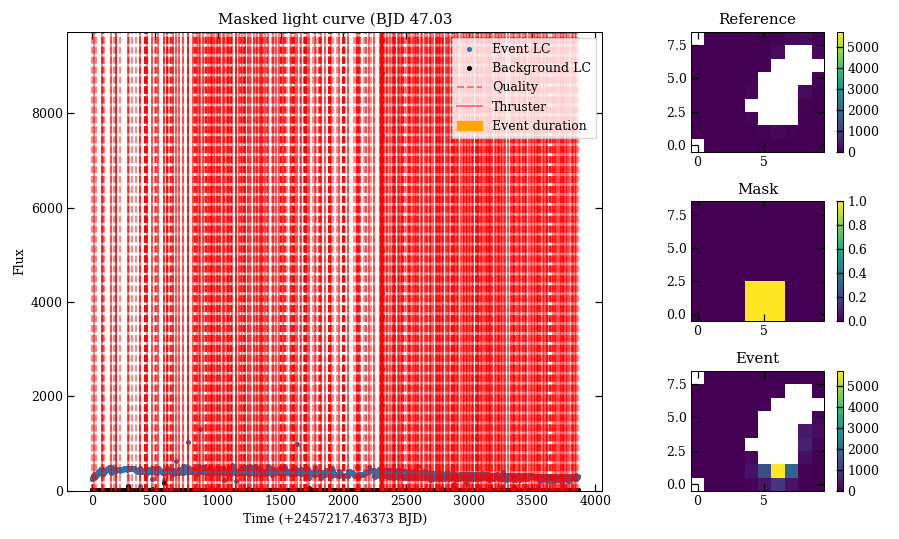

<IPython.core.display.Javascript object>


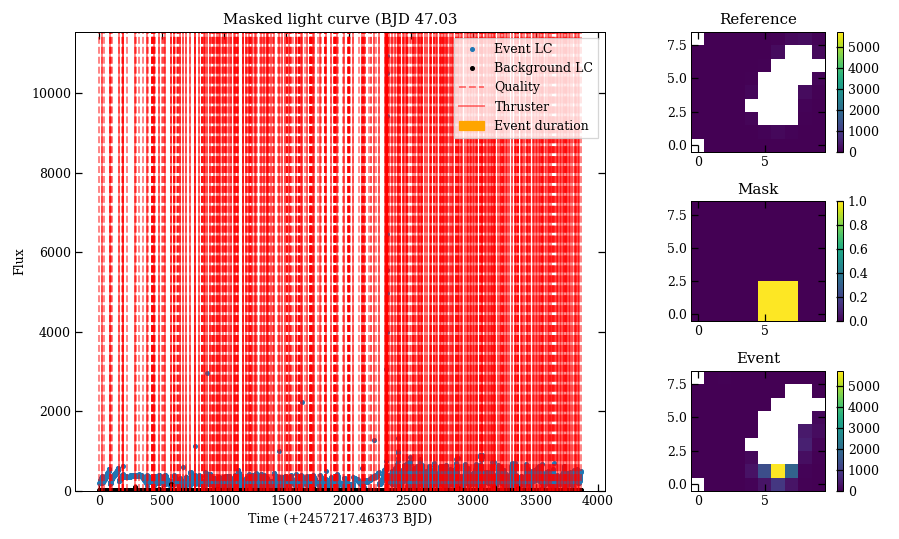

<IPython.core.display.Javascript object>


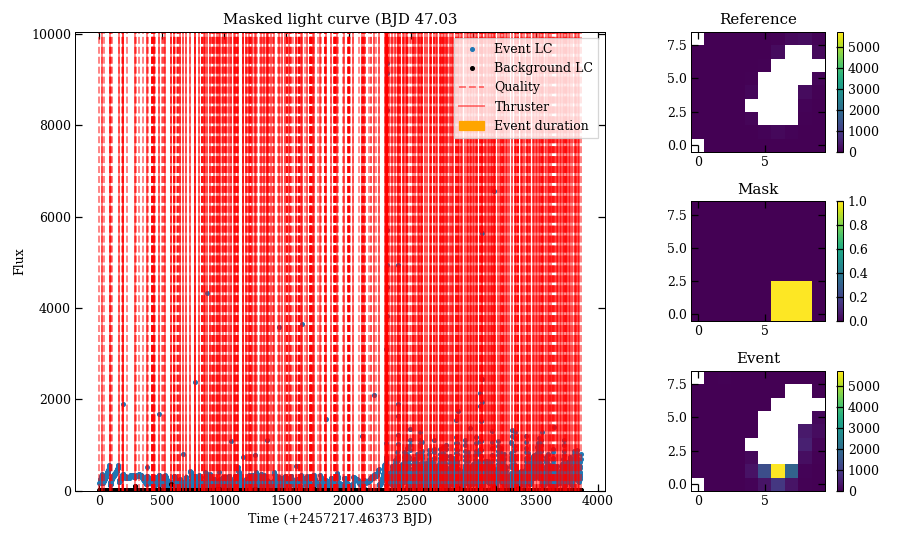

<IPython.core.display.Javascript object>


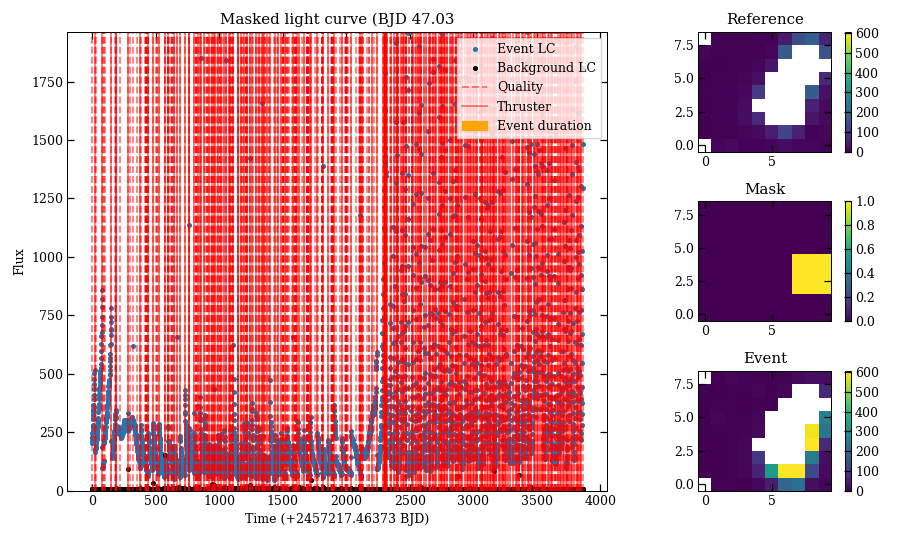

<IPython.core.display.Javascript object>


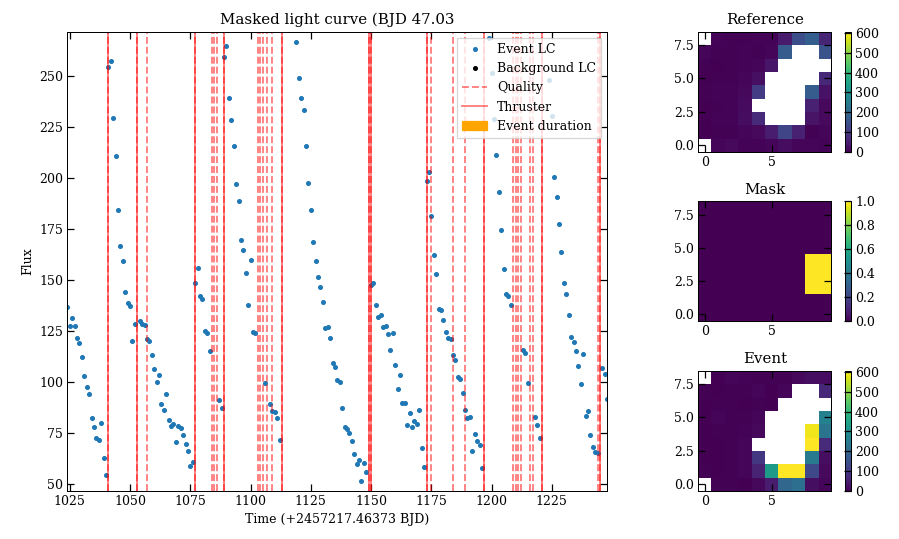

<IPython.core.display.Javascript object>


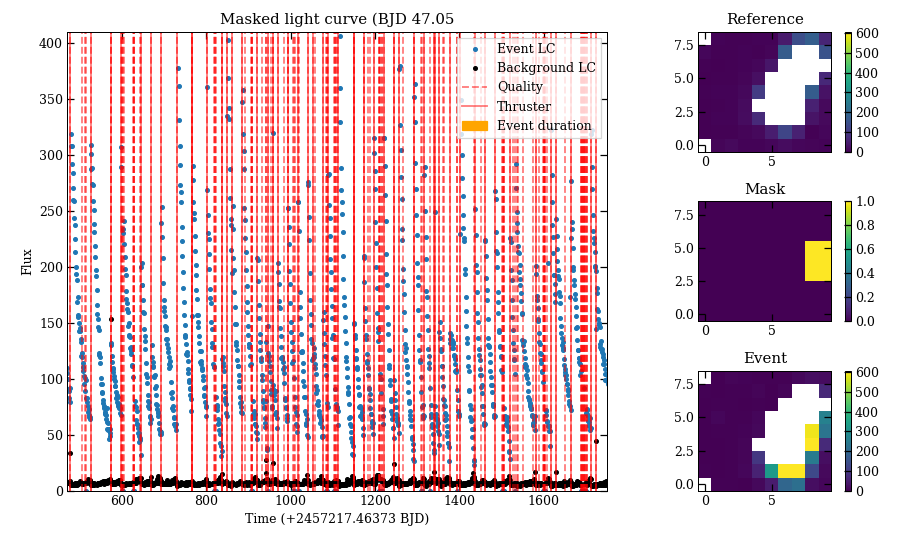

In [181]:
plt.close()
counter = 0
for i in range(len(events)):
    # Check if there are multiple transients
    #Find Coords of transient
    position = np.where(eventmask[i])
    middle = int(np.ceil(np.nansum(eventmask[i])/2))
    

    # Generate a light curve from the transient masks
    LC = np.nansum(Maskdata*eventmask[i], axis = (1,2))
    BG = Maskdata*~Eventmask[events[i]]
    BG[BG <= 0] =np.nan
    BGLC = np.nanmedian(BG, axis = (1,2))

    maxcolor = np.nanmax(Maskdata[eventtime[i][0]:eventtime[i][-1]]*eventmask[i])

    fig = plt.figure(figsize=(10,6))
    # set up subplot grid
    gridspec.GridSpec(3,3)

    # large subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
    plt.title('Masked light curve (BJD '+str(round(time[eventtime[i][0]]-time[0],2)))
    plt.xlabel('Time (+'+str(time[0])+' BJD)')
    plt.ylabel('Flux')
    plt.plot(LC,'.', label = 'Event LC')
    plt.plot(BGLC,'k.', label = 'Background LC')
    plt.axvspan(eventtime[i][0],eventtime[i][-1], color = 'orange', label = 'Event duration')
    plt.axvline(quality[0],color = 'red', linestyle='dashed',label = 'Quality', alpha = 0.5)
    for j in range(quality.shape[0]-1):
        j = j+1 
        plt.axvline(quality[j], linestyle='dashed', color = 'red', alpha = 0.5)
    # plot Thurster firings 
    plt.axvline(thrusters[0],color = 'red',label = 'Thruster', alpha = 0.5)
    for j in range(thrusters.shape[0]-1):
        j = j+1 
        plt.axvline(thrusters[j],color = 'red', alpha = 0.5)
    xmin = eventtime[i][0]#-(eventtime[i][-1]-eventtime[i][0])/10
    xmax = eventtime[i][-1]#+(eventtime[i][-1]-eventtime[i][0])/10
    if xmin < 0:
        xmin = 0
    if xmax > time[-1] - time[0]:
        xmax = time[-1] - time[0]
    #plt.xlim(xmin,xmax) # originally 48 for some reason
    plt.ylim(0,np.nanmax(LC[eventtime[i][0]:eventtime[i][-1]])+0.1*np.nanmax(LC[eventtime[i][0]:eventtime[i][-1]]))
    plt.legend(loc = 1)
    # small subplot 1 Reference image plot
    plt.subplot2grid((3,3), (0,2))
    plt.title('Reference')
    plt.imshow(Maskdata[Framemin,:,:], origin='lower',vmin=0,vmax = maxcolor)
    plt.colorbar()
    # small subplot 2 Event mask
    plt.subplot2grid((3,3), (1,2))
    plt.title('Mask')
    plt.imshow(eventmask[i], origin='lower')
    plt.colorbar()
    # small subplot 3 Image of event
    plt.subplot2grid((3,3), (2,2))
    plt.title('Event')
    plt.imshow(Maskdata[np.where(Maskdata*eventmask[i]==np.nanmax(Maskdata[eventtime[i][0]:eventtime[i][-1]]*eventmask[i]))[0][0],:,:], origin='lower',vmin=0,vmax = maxcolor)
    plt.colorbar()
    if eventmask.shape[0] == 1 or eventmask.shape[1] == 1:
        plt.xticks([-0.5,0,0.5],['',0,''])
    # fit subplots and save fig
    fig.tight_layout()
    #fig.set_size_inches(w=11,h=7)
    #plt.savefig(save+pixelfile.split('/')[-1].split('-')[0]+'_'+str(counter)+'.pdf', bbox_inches = 'tight');


<IPython.core.display.Javascript object>


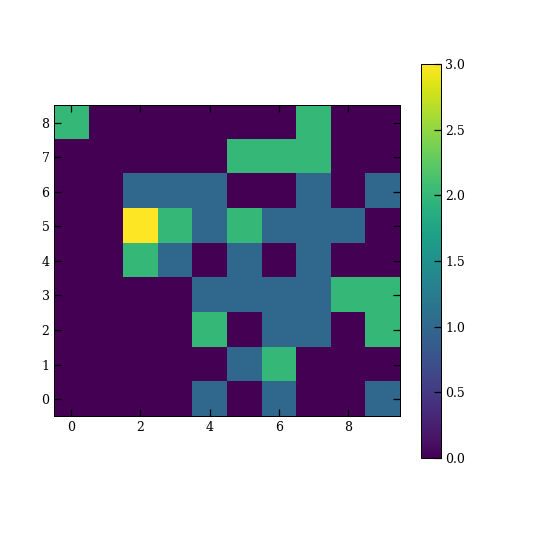

<IPython.core.display.Javascript object>


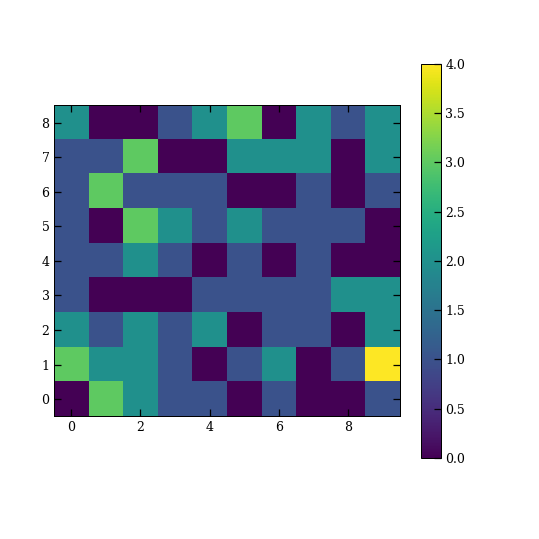

<IPython.core.display.Javascript object>


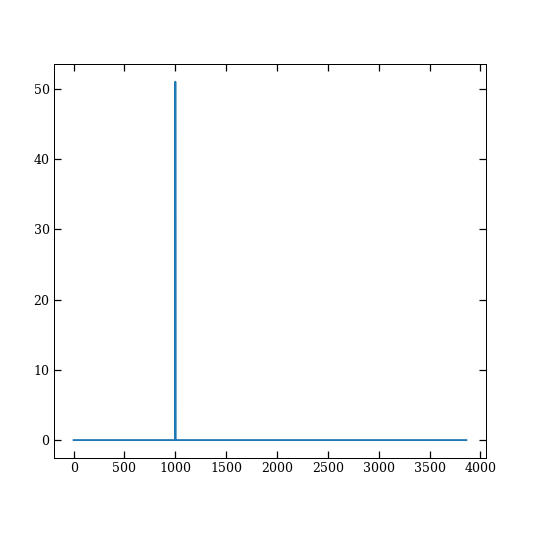

In [200]:
Fails = np.zeros((data.shape[1],data.shape[2]))
Seed = np.zeros((data.shape[1],data.shape[2]))
Failtime = np.zeros(data.shape[0])
for i in range(len(Result[0])):
    Seed[positions[i][0],positions[i][1]] +=1
    if Result[0,i] == 0:
        Fails[positions[i][0],positions[i][1]] +=1
        Failtime[starts[i]] += 1
        
plt.figure()
plt.imshow(Fails,origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(Seed,origin='lower')
plt.colorbar()


plt.figure()
plt.plot(Failtime)

In [166]:
len(positions)

100

In [161]:
Result[0,1]

1.0

In [ ]:
a.